# Maya

## Research question/interests

My research questions focus on CO2 emissions and GDP. I have two main questions which are:

1. Over the years, how does the relationship between GDP and CO2 emissions compare for the  15 richest Countries vs the 15 poorest countries? What about during financial crises periods?

2. How does the average CO2 emissions per capita of high GDP countries compare to low GDP countries, and the rest of the world? Has this changed over the years?


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


dataEmissions = pd.read_csv('../data/raw/CO2emissions.csv', skiprows=4) 
dataEmissions = dataEmissions.drop(dataEmissions.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]], axis=1)
dataEmissions = dataEmissions.drop(dataEmissions.columns[[31, 32,33]], axis=1)
 
#clean data, remove rows that are not specific countries
dataEmissions.drop(dataEmissions.index[[1,3, 7, 36, 49, 61, 62,63, 64, 65, 73, 
                             74, 95, 98, 102, 103, 104, 105, 107, 110, 
                             128, 134, 135, 136, 139, 140, 142, 153, 156, 161,
                             181, 183, 191, 198, 215, 218, 230, 231, 236, 
                             238, 240, 241, 249, 259]], inplace=True)


In [7]:
dataGDP = pd.read_csv('../data/raw/gdp-per-capita-worldbank.csv')


## Milestone 3 


### Prepare Data For EDA 

In [8]:

#Wrangle Data: Restructure data format of Emissions Data
dataEmissions = dataEmissions.melt(id_vars = ["Country Name"])
dataEmissions2 = dataEmissions.copy(deep = False )

#Process Data: Rename rows in restruced Emissions data 
dataEmissions2.rename(columns={dataEmissions2.columns[1]: 'Year', dataEmissions2.columns[2]: 'CO2 emissions'},inplace=True)

#Clean Data: Drop rows that don't have CO2 emissions data 
dataEmissions2=dataEmissions2.dropna(subset=['CO2 emissions'])
dataEmissions2.to_csv(r'../data/processed/modifiedEmissions.csv', index=False)



#Process Data: Rename GDP column to make it mergable with CO2 emissions Data 
dataGDP.rename(columns={dataGDP.columns[0]: 'Country Name'}, inplace=True)
dataGDP.to_csv(r'../data/processed/modifiedGDP.csv', index=False)

#Process Data: Make sure GDP and data Emissions columns are of the same type int, else they aren't mergable
dataGDP['Year'] = dataGDP['Year'].astype(int)
dataEmissions2['Year'] = dataEmissions2['Year'].astype(int)

#Merge CO2 emissions data and GDP, keeping extra columns from GDP
mergeCO2AndGDP = pd.merge(dataGDP, dataEmissions2, on=['Country Name', 'Year'], how = 'left')

#Clean Data: Drop missing values and save data 
mergeCO2AndGDP = mergeCO2AndGDP.dropna(subset=['CO2 emissions'])
mergeCO2AndGDP.to_csv(r'../data/processed/CO2AndGDP.csv', index=False)



In [9]:
#Wranlge Data 

#Establish countries with highest and lowest GDPs to help answer my research questions
#SOURCE: https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD

#The 15 Countries with highest GDP - PPP (per capita adjusted for purchasing power)in 2021 according to World Bank
listTop15 = ["Luxembourg", "Singapore", "Ireland", "Qatar", "Bermuda", 
                          "Norway", "Switzerland", "United States", "United Arab Emirates",
                          "Brunei", "Hong Kong", "Denmark", "Netherlands"]

#The 15 Countries with lowest GDP - PPP (per capita adjusted for purchasing power)in 2019
listBottom15 = ["Burundi", "Central Africa Republic", "Congo, Rep.", "Somalia", "Niger", 
                "Mozambique", "Liberia", "Chad", "Eritrea", "Madagascar", 
                "Malawi", "Sierra Leone","Guinea-Bissau", "Afghanistan", "Kiribati"]
        

#Checks if a country is in on of the two categories: 15 highest GDP countries, 15 lowest GDP countries
def isTop15(row):
    if row['Country Name'] in listTop15:
        return "Top 15"
    if row['Country Name'] in listBottom15:
        return "Bottom 15"
    else:
        return "Neither" 
    
#Create a new column, that indicates which category it falls under 
mergeCO2AndGDP['GDP - PPP Ranking'] = mergeCO2AndGDP.apply(isTop15, axis=1)

#Save as a new dataset
mergeCO2AndGDP.to_csv(r'../data/processed/CO2AndGDPAnalysis.csv', index=False)


## Task 1 - Exploratory Data Analysis

First I will analyze each dataset I'm investigating, individually

In [10]:
dataEmissions2.head()

,Country Name,Year,CO2 emissions
1,Afghanistan,1990,0.191745
2,Angola,1990,0.553662
3,Albania,1990,1.819542
4,Andorra,1990,7.521832
5,United Arab Emirates,1990,30.195189


In [ ]:
print(f"Rows, Columns:  {dataEmissions2.shape}")
print()
print("Column Name    Column Type")
print(dataEmissions2.dtypes)
dataEmissions2.describe()

Rows, Columns:  (5944, 3)

Column Name    Column Type
Country Name      object
Year               int64
CO2 emissions    float64
dtype: object


,Year,CO2 emissions
count,5944.000000,5944.000000
mean,2004.547275,4.290987
std,8.642241,5.453740
min,1990.000000,0.000000
25%,1997.000000,0.589271
50%,2005.000000,2.376607
75%,2012.000000,6.305612
max,2019.000000,50.954034


In [11]:
dataGDP.head()

,Country Name,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
0,Afghanistan,AFG,2002,1189.784668
1,Afghanistan,AFG,2003,1235.810059
2,Afghanistan,AFG,2004,1200.277954
3,Afghanistan,AFG,2005,1286.793701
4,Afghanistan,AFG,2006,1315.789062


In [12]:

print(f"Rows, Columns:  {dataGDP.shape}")
print()
print("Column Name    Column Type")
print(dataGDP.dtypes)
dataGDP.describe()

Rows, Columns:  (6166, 4)

Column Name    Column Type
Country Name                                            object
Code                                                    object
Year                                                     int64
GDP per capita, PPP (constant 2017 international $)    float64
dtype: object


,Year,"GDP per capita, PPP (constant 2017 international $)"
count,6166.000000,6166.000000
mean,2005.432533,17879.286262
std,8.841631,20132.683171
min,1990.000000,436.720367
25%,1998.000000,3678.829102
50%,2006.000000,10365.778320
75%,2013.000000,25832.031738
max,2020.000000,161971.468750


From this analysis, I can see that both data sets have a similar amount of rows and columns. Additionally, they have some of the same columns (Country Name and Year). This is good for my analysis since I will merge these datasets. I can see from the summary statistics that the years vary slightly, so we will loose some of this data when the merge is performed. 

## EDAVisualizations

Text(0, 0.5, 'CO2 Emissions per capita')

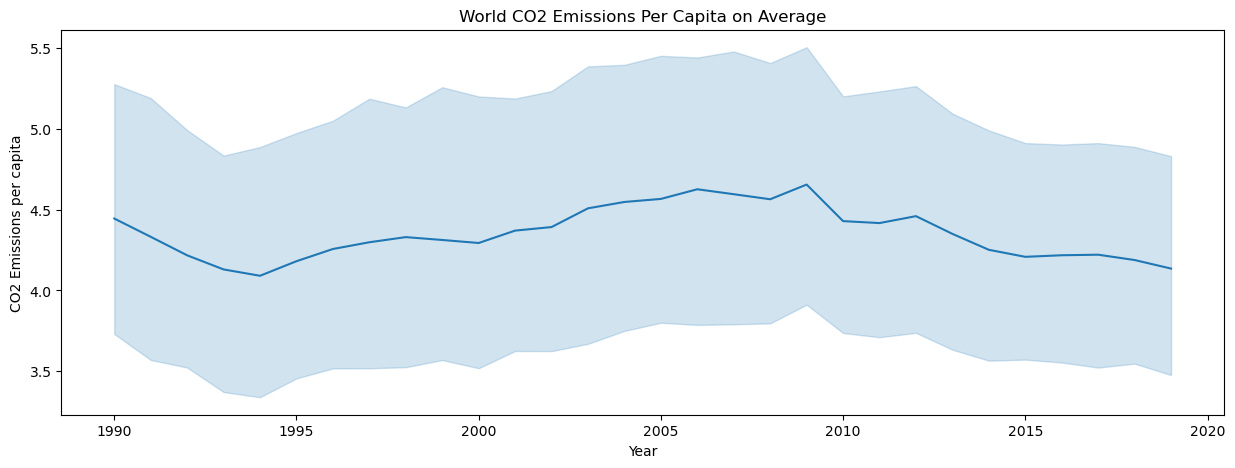

In [14]:
#Visualization for CO2 emissions
palette = sns.color_palette("Set2")

plt.figure(figsize=(15,5))

plotEmissions = sns.lineplot(x="Year", y="CO2 emissions", data=dataEmissions2)
plotEmissions.set(title='World CO2 Emissions Per Capita on Average')
plotEmissions.set_ylabel("CO2 Emissions per capita")

This graph shows how the average CO2 emissions per capita (over all countries) has fluctuated throughout the years. From this graph I can see the word's average CO2 emissions per capita, reached a peak during 2010. But after this peak it began a slight downwards trend. I am interested in seeing how this graph would differ for countries with high GDPs and countries with low GDPs. 

Text(0, 0.5, 'GDP per capita')

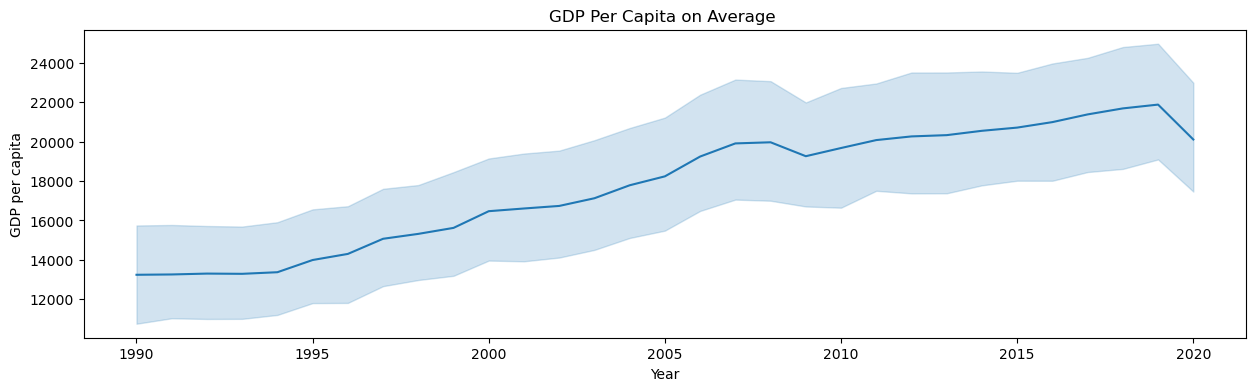

In [15]:
#Visualization for GDP emissions

plt.figure(figsize=(15,4))
GDPEmissions = sns.lineplot(x="Year", y="GDP per capita, PPP (constant 2017 international $)", data=dataGDP)
GDPEmissions.set(title='GDP Per Capita on Average ')
GDPEmissions.set_ylabel("GDP per capita")

We can see that the average GDP per capita from around the world, has been steadily increasing. There are dips in GDP during the years of 2008 and 2020, which makes sense as there recessions during this time. There is less varitation in this graph than there was in CO2

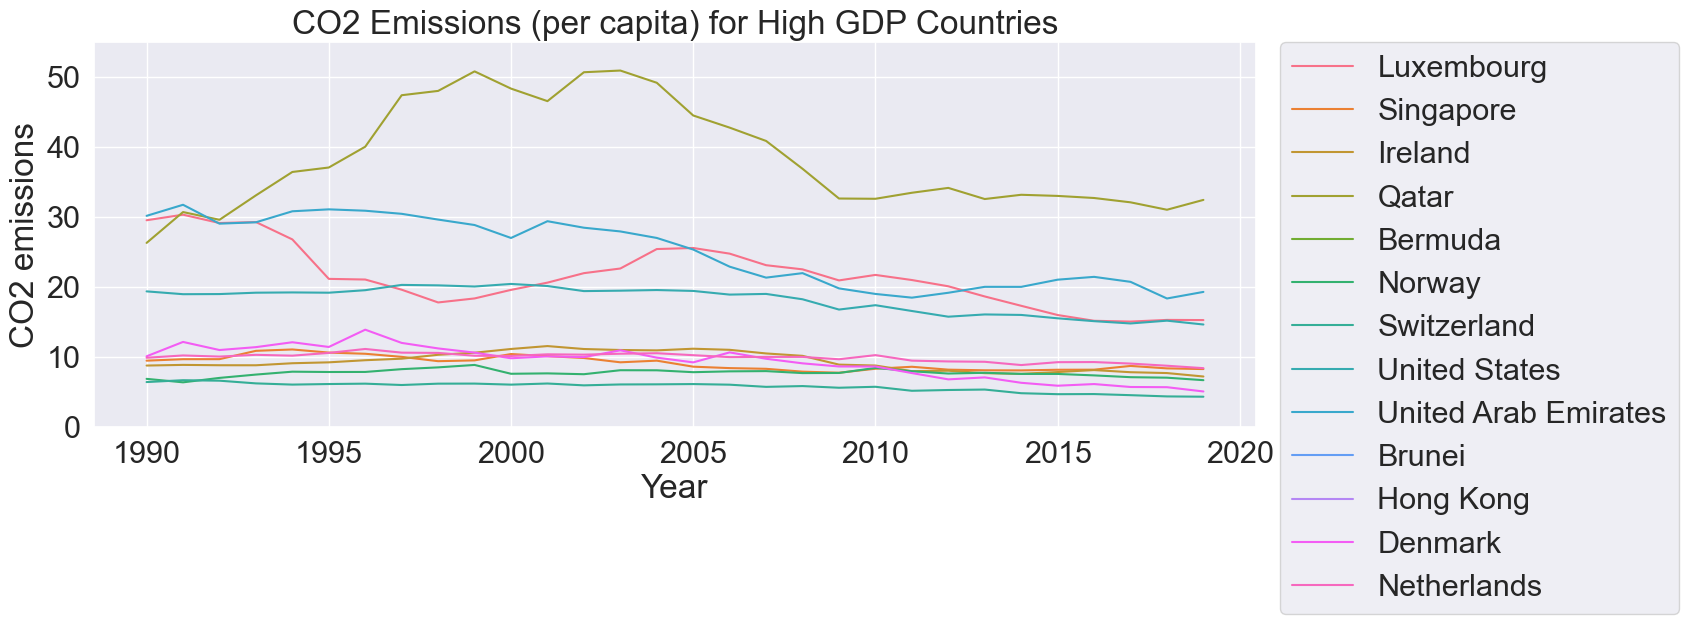

In [45]:
#Analysis for 15 countries with the highest GDP
plt.figure(figsize=(15,5))

co2EmissionsHighGdp = sns.lineplot(data=dataEmissions2, x="Year", y= "CO2 emissions", hue="Country Name", hue_order=listTop15)

plt.ylim(0, 55)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

sns.set(font_scale=2)
co2EmissionsHighGdp.set(title='CO2 Emissions (per capita) for High GDP Countries')
GDPEmissions.set_ylabel("CO2 Emissions per capita")

fig = co2EmissionsHighGdp.get_figure()
fig.savefig("../images/notebook2eda1.png", bbox_inches = 'tight')

Text(0, 0.5, 'GDP')

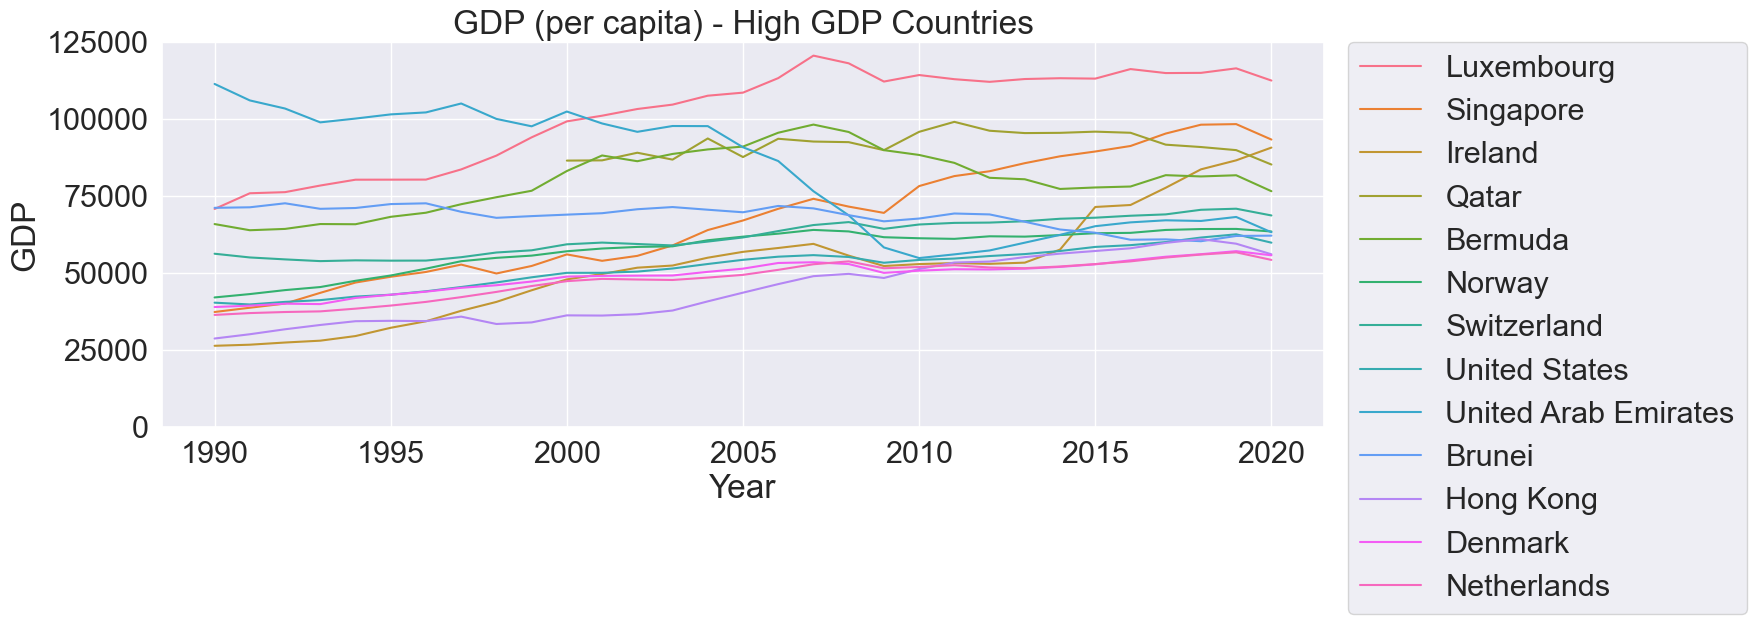

In [17]:
#Analysis for 15 countries with the highest GDP
plt.figure(figsize=(15,5))


highGdp = sns.lineplot(data=dataGDP, x="Year", y="GDP per capita, PPP (constant 2017 international $)", hue="Country Name", hue_order=listTop15)
plt.ylim(0, 125000)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

sns.set(font_scale=2)
highGdp.set(title='GDP (per capita) - High GDP Countries')
highGdp.set_ylabel("GDP")

To get a closer look at the data, I decided to focus  just on the CO2 emissions for high GDP countries. For a majority of the countries displayed, they hit their highest CO2 emissions per capita sometime before 2005. After 2005, we can see many of the countries begin a downwards trend. 

After I plotted the GDP for these countries to see if there is some kind of relationship with the CO2 graph above. It seems that GDP and CO2 did move together upwards until 2005. After 2005 GDP continues upwards and CO2 goes downwards.

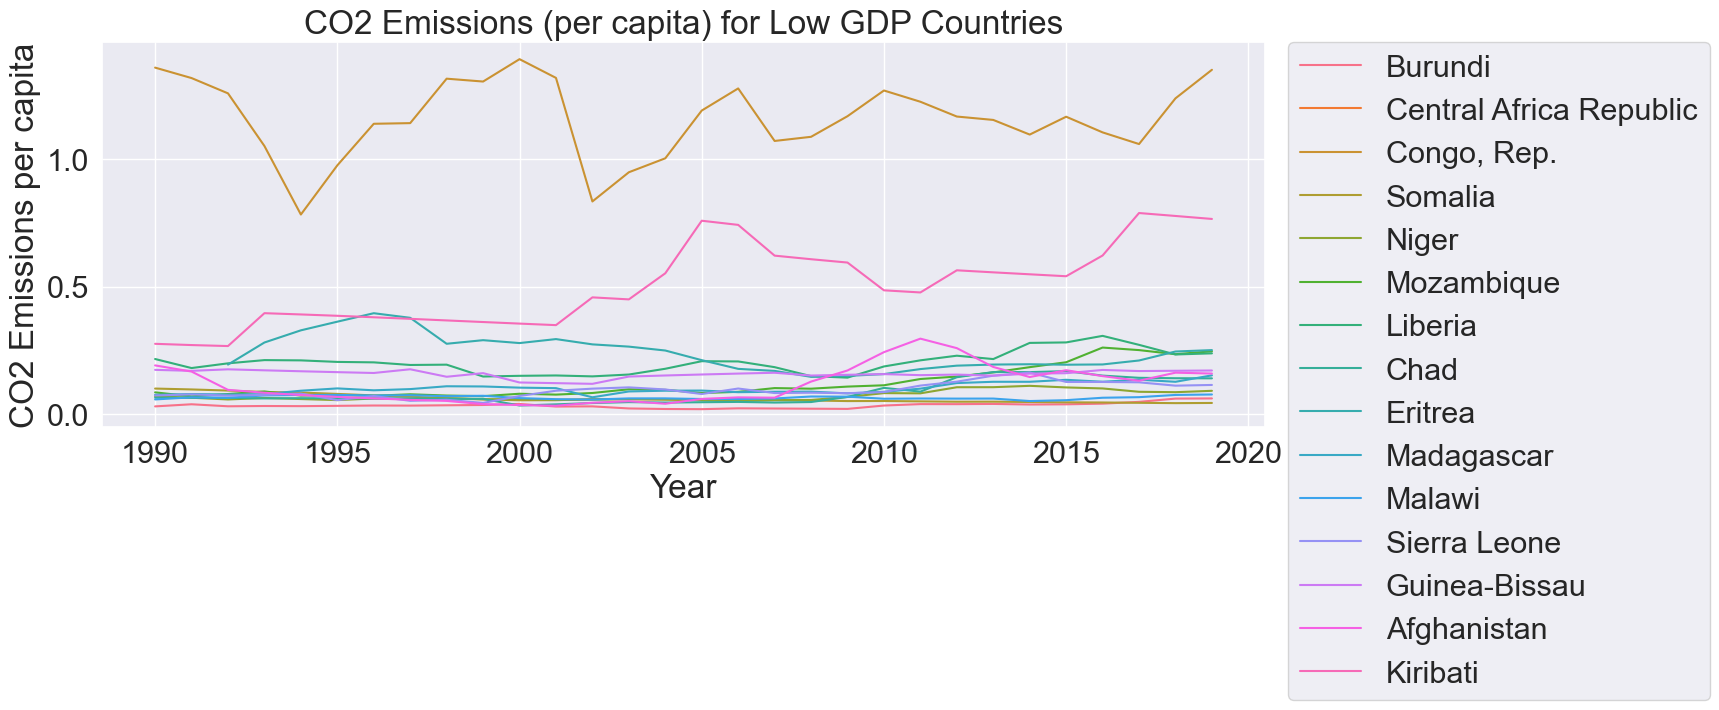

In [46]:
#Analysis for 15 countries with the lowest GDP
plt.figure(figsize=(15,5))

co2EmissionsLowGdp = sns.lineplot(data=dataEmissions2, x="Year", y= "CO2 emissions", hue="Country Name", hue_order=listBottom15)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

sns.set(font_scale=2)
co2EmissionsLowGdp.set(title='CO2 Emissions (per capita) for Low GDP Countries')
co2EmissionsLowGdp.set_ylabel("CO2 Emissions per capita")

fig = co2EmissionsLowGdp.get_figure()
fig.savefig("../images/notebook2eda2.png", bbox_inches = 'tight')


Text(0, 0.5, 'GDP')

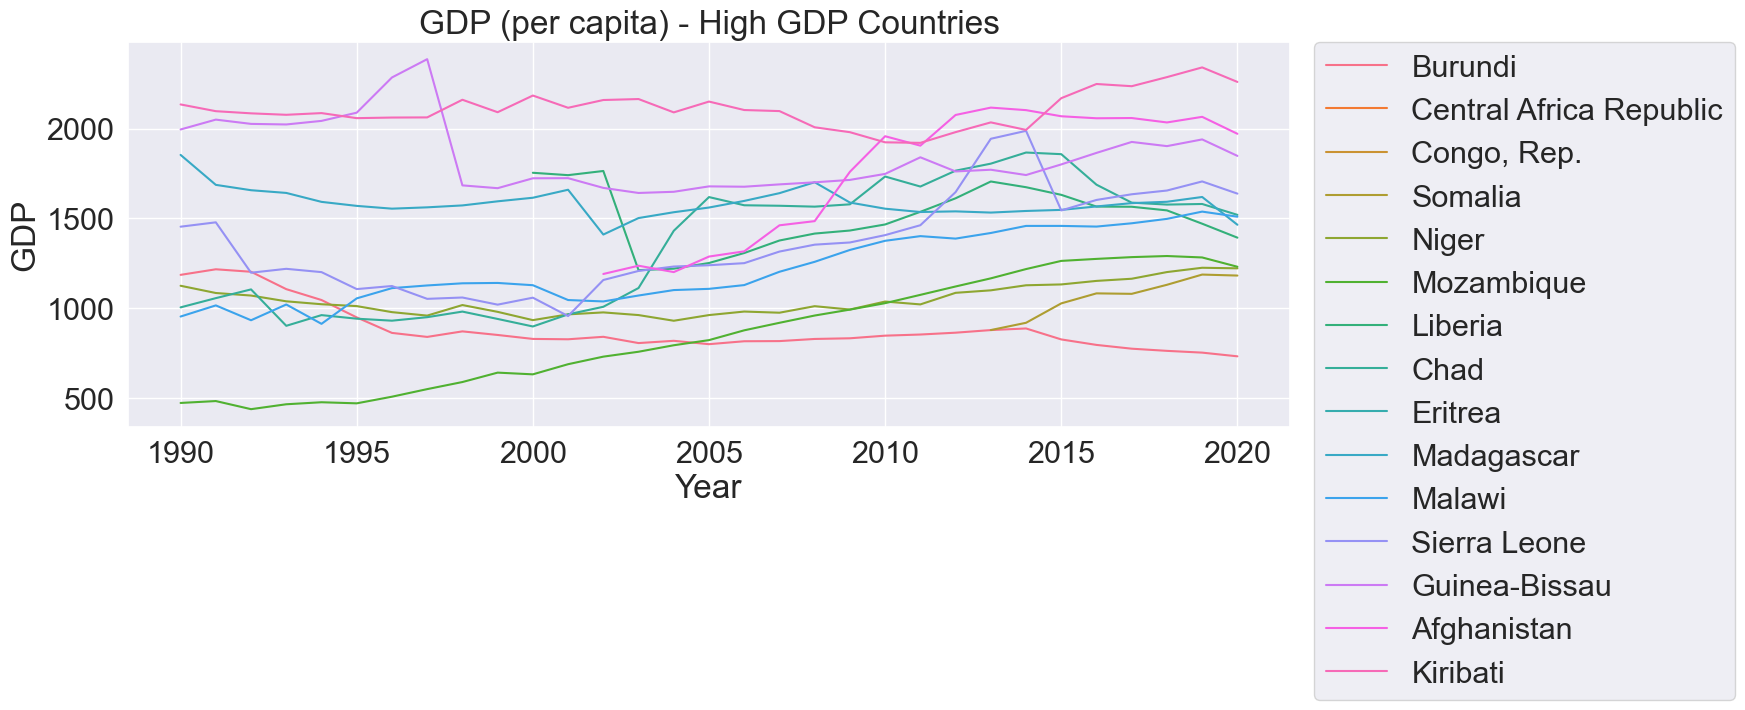

In [19]:
#Analysis for 15 countries with the lowest GDP
plt.figure(figsize=(15,5))

lowGDP = sns.lineplot(data=dataGDP, x="Year", y="GDP per capita, PPP (constant 2017 international $)", hue="Country Name", hue_order=listBottom15)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

sns.set(font_scale=2)
lowGDP.set(title='GDP (per capita) - High GDP Countries')
lowGDP.set_ylabel("GDP")

Here I have graphed CO2 and GDP for countries with low GDPs, to see if there are any similarities between the two graphs. Both graphs appear to be pretty stable, there is not much fluxuation. Except that after 2015 both move up slightly. 

I noticed it's a bit difficult to analyze the relationship between CO2 and GDP for the two different groups of countries since they are on seperate graphs. It would be better to have the CO2 and GDP graphs overlayed. But with so many countires, this would result in a difficult to read graph. So I've decided to answer my final research questions, I will just take the average for each country and have GDP/CO2 in one graph.

### Task 2 - Data Analysis Pipeline
1. Load Data (Done in cell 1 and 2)
2. Clean Data (Done in cell 1 and 3) 
3. Process Data (Done in cell 3)
4. Wrangle Data (Done in cell 3 and 4)  

### Task 3 - Method Chaining and Writing Python Programs 

In [22]:
#Method Chaining 
def load_and_process_emissions2(url_or_path_to_csv_file):

    # Load data and deal with missing data and remove data that is not useful
    dataEmissions = pd.read_csv(url_or_path_to_csv_file, skiprows=4) 

    dataEmissions = (
        dataEmissions
        .drop(dataEmissions.columns[[1,2,3,4,5,6,7,8,9,10,11,12,
                                     13 ,14,15,16,17,18,19,20,21,
                                     22,23, 24,25,26,27,28,29,30,31,32,33]], axis=1)
        .drop(dataEmissions.index[[1,3, 7, 36, 49, 61, 62,63, 64, 65, 73, 
                             74, 95, 98, 102, 103, 104, 105, 107, 110, 
                             128, 134, 135, 136, 139, 140, 142, 153, 156, 161,
                             181, 183, 191, 198, 215, 218, 230, 231, 236, 
                             238, 240, 241, 249, 259]])
        .melt(id_vars = ["Country Name"])
        .rename(columns={'variable': 'Year',
                         'value': 'CO2 emissions'})
        .dropna(subset=['CO2 emissions'])  
        
    )
    
    dataEmissions['Year'] = dataEmissions['Year'].astype(int)
    dataEmissions.to_csv(r'../data/processed/modifiedEmissions.csv', index=False)

    return dataEmissions 


def load_and_process_GDP2(url_or_path_to_csv_file):
    dataGDP = pd.read_csv(url_or_path_to_csv_file)
    
    dataGDP = (
        dataGDP
        .rename(columns={dataGDP.columns[0]: 'Country Name'})
    
    )
    
    dataGDP['Year'] = dataGDP['Year'].astype(int)
    dataGDP.to_csv(r'../data/processed/modifiedGDP.csv', index=False)
    
    return dataGDP 
     
        
def load_and_process_GDP_Emissions2(emissionsUrl, gdpUrl):
    
    dataEmissions = pd.read_csv(emissionsUrl)
    dataGDP = pd.read_csv(gdpUrl)
    
     #Establish countries with highest and lowest GDPs to help answer my research questions
    #SOURCE: https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD
    #The 15 Countries with highest GDP - PPP (per capita adjusted for purchasing power)in 2021 according  to World Bank
    listTop15 = ["Luxembourg", "Singapore", "Ireland", "Qatar", "Bermuda", 
                          "Norway", "Switzerland", "United States", "United Arab Emirates",
                          "Brunei", "Hong Kong", "Denmark", "Netherlands"]
    #The 15 Countries with lowest GDP - PPP (per capita adjusted for purchasing power)in 201
    listBottom15 = ["Burundi", "Central Africa Republic", "Congo, Rep.", "Somalia", "Niger", 
                "Mozambique", "Liberia", "Chad", "Eritrea", "Madagascar", 
                "Malawi", "Sierra Leone","Guinea-Bissau", "Afghanistan", "Kiribati"]
    
    def isTop15(row):
        if row['Country Name'] in listTop15:
            return "Top 15"
        if row['Country Name'] in listBottom15:
            return "Bottom 15"
        else:
            return "Neither" 
    
   #Drop empty cells and merge the two dfs  
    mergeData = (pd.merge(dataGDP, dataEmissions, 
                         on=['Country Name', 'Year'],
                         how = 'left')
                 .dropna(subset=['CO2 emissions'])
                )
    #Create new column
    mergeData['GDP - PPP Ranking'] = mergeData.apply(isTop15, axis=1)

    
    mergeData.to_csv(r'../data/processed/CO2AndGDPAnalysis.csv', index=False)

    return mergeData

In [29]:

import project_function2 as p2 
emissionsData = p2.load_and_process_emissions2('../data/raw/CO2emissions.csv')
gdpData = p2.load_and_process_GDP2('../data/raw/gdp-per-capita-worldbank.csv')
emissionsAndGDP = p2.load_and_process_GDP_Emissions2('../data/processed/modifiedEmissions.csv', '../data/processed/modifiedGDP.csv')


,Country Name,Code,Year,"GDP per capita, PPP (constant 2017 international $)",CO2 emissions,GDP - PPP Ranking
0,Afghanistan,AFG,2002,1189.784668,0.045574,Bottom 15
1,Afghanistan,AFG,2003,1235.810059,0.051518,Bottom 15
2,Afghanistan,AFG,2004,1200.277954,0.041655,Bottom 15
3,Afghanistan,AFG,2005,1286.793701,0.060419,Bottom 15
4,Afghanistan,AFG,2006,1315.789062,0.066583,Bottom 15
...,...,...,...,...,...,...
6160,Zimbabwe,ZWE,2015,3707.622559,0.899770,Neither
6161,Zimbabwe,ZWE,2016,3678.217041,0.785441,Neither
6162,Zimbabwe,ZWE,2017,3795.642334,0.726297,Neither
6163,Zimbabwe,ZWE,2018,3923.030518,0.857411,Neither


### Task 4 - Answering My Research Questions 

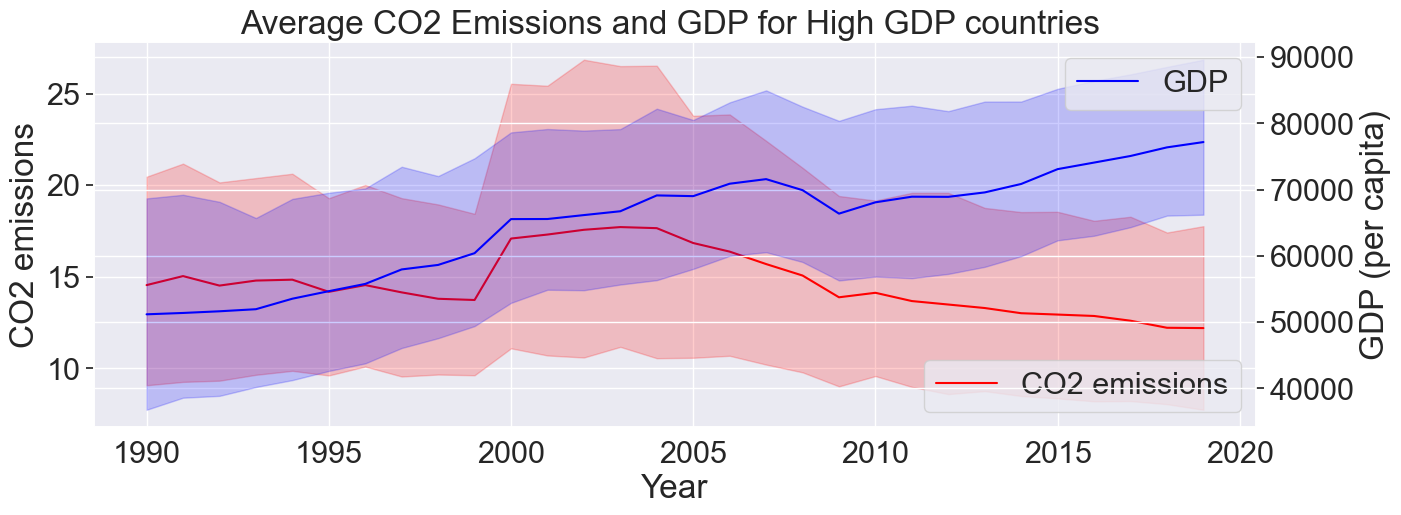

In [38]:
#Research Question 1

#Analysis for high GDP countries
plt.figure(figsize=(15,5))

gdpCO2AnalysisHighGDP = emissionsAndGDP[emissionsAndGDP['GDP - PPP Ranking'] == "Top 15"]
plotEmissions = sns.lineplot(x="Year", 
                             y="CO2 emissions", 
                             data=gdpCO2AnalysisHighGDP,
                             color='red',
                             label="CO2 emissions"
                             
                            )

ax2 = plotEmissions.twinx()
plotGDP = sns.lineplot(x="Year", 
                       y="GDP per capita, PPP (constant 2017 international $)", 
                       ax = ax2, 
                       data=gdpCO2AnalysisHighGDP,
                        color='blue',
                       label="GDP"
                      )

plotEmissions.legend(ncol=2, loc="lower right", frameon=True)

plotGDP.set(ylabel = "GDP (per capita)")
plotGDP.set(title='Average CO2 Emissions and GDP for High GDP countries ')


fig = plotEmissions.get_figure()
fig.savefig("../images/notebook2fig1.png") 

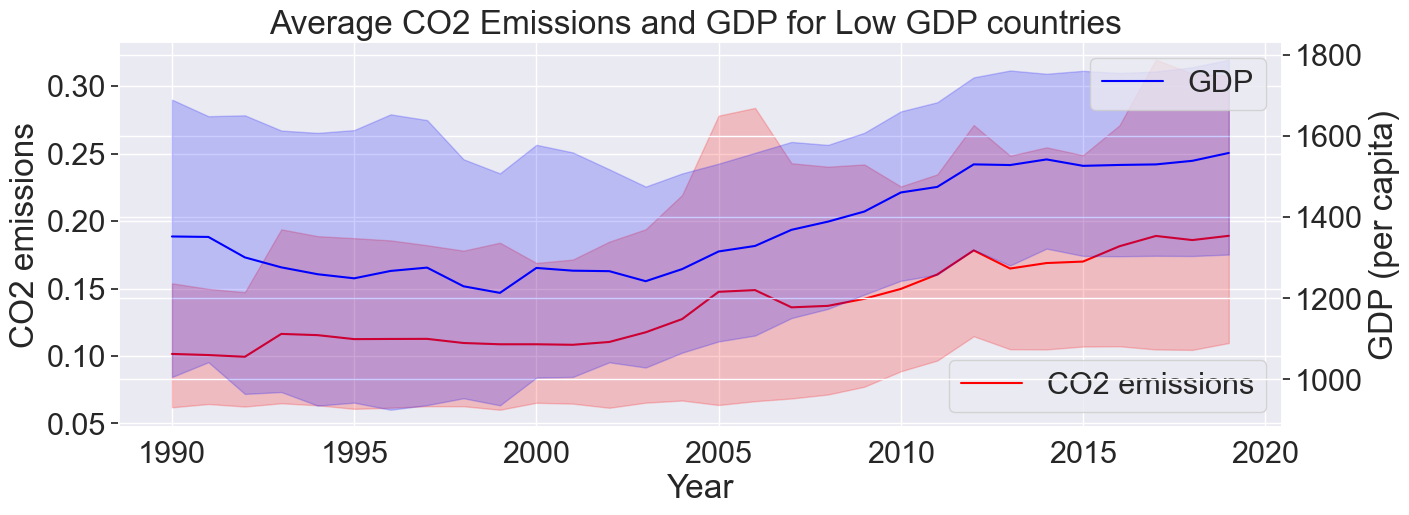

In [39]:
#Analysis for low GDP countries
plt.figure(figsize=(15,5))


#Plot CO2 emissions Line
gdpCO2AnalysiLowGDP = emissionsAndGDP[emissionsAndGDP['GDP - PPP Ranking'] == "Bottom 15"]
plotEmissionsLowGDP = sns.lineplot(x="Year", 
                             y="CO2 emissions", 
                             data=gdpCO2AnalysiLowGDP,
                             color='red', label="CO2 emissions")

#Plot GDP Line
ax2 = plotEmissionsLowGDP.twinx()
plotLowGDP = sns.lineplot(x="Year", 
                       y="GDP per capita, PPP (constant 2017 international $)", 
                       ax = ax2, 
                       data=gdpCO2AnalysiLowGDP,
                       color='blue', label="GDP"
                          
                      )
plotEmissionsLowGDP.legend(ncol=2, loc="lower right", frameon=True)


plotEmissionsLowGDP.set(title='Average CO2 Emissions and GDP for Low GDP countries ')
plotLowGDP.set(ylabel = "GDP (per capita)")

fig = plotEmissionsLowGDP.get_figure()
fig.savefig("../images/notebook2fig2.png") 

#### Over the years, how does the relationship between GDP and CO2 emissions compare for the  15 richest Countries vs the 15 poorest countries? What about during financial crises periods?

For the 15 countries with the highest GDP, it appears CO2 and GDP both moved together up until around 2005. After, 2005 the two diverged since CO2 emissions began decreasing and GDP continued moving upwards. (see figure 1)


For the 15 countries with the lowest GDP, we can see that CO2 emissions and GDP move together very closely. Both are low between 1990 and 1995 and then begin to increase steadily from then on. (see figure 2)

During the 2008 financial crisis, we see that both CO2 and GDP dipped for high GDP countries. However, for the low GDP countries it appears the 2008 crisis had no impact on their GDP/CO2.

Overall presently, CO2/GDP for high GDP countries move oppositely and move together for low GDP countries. 

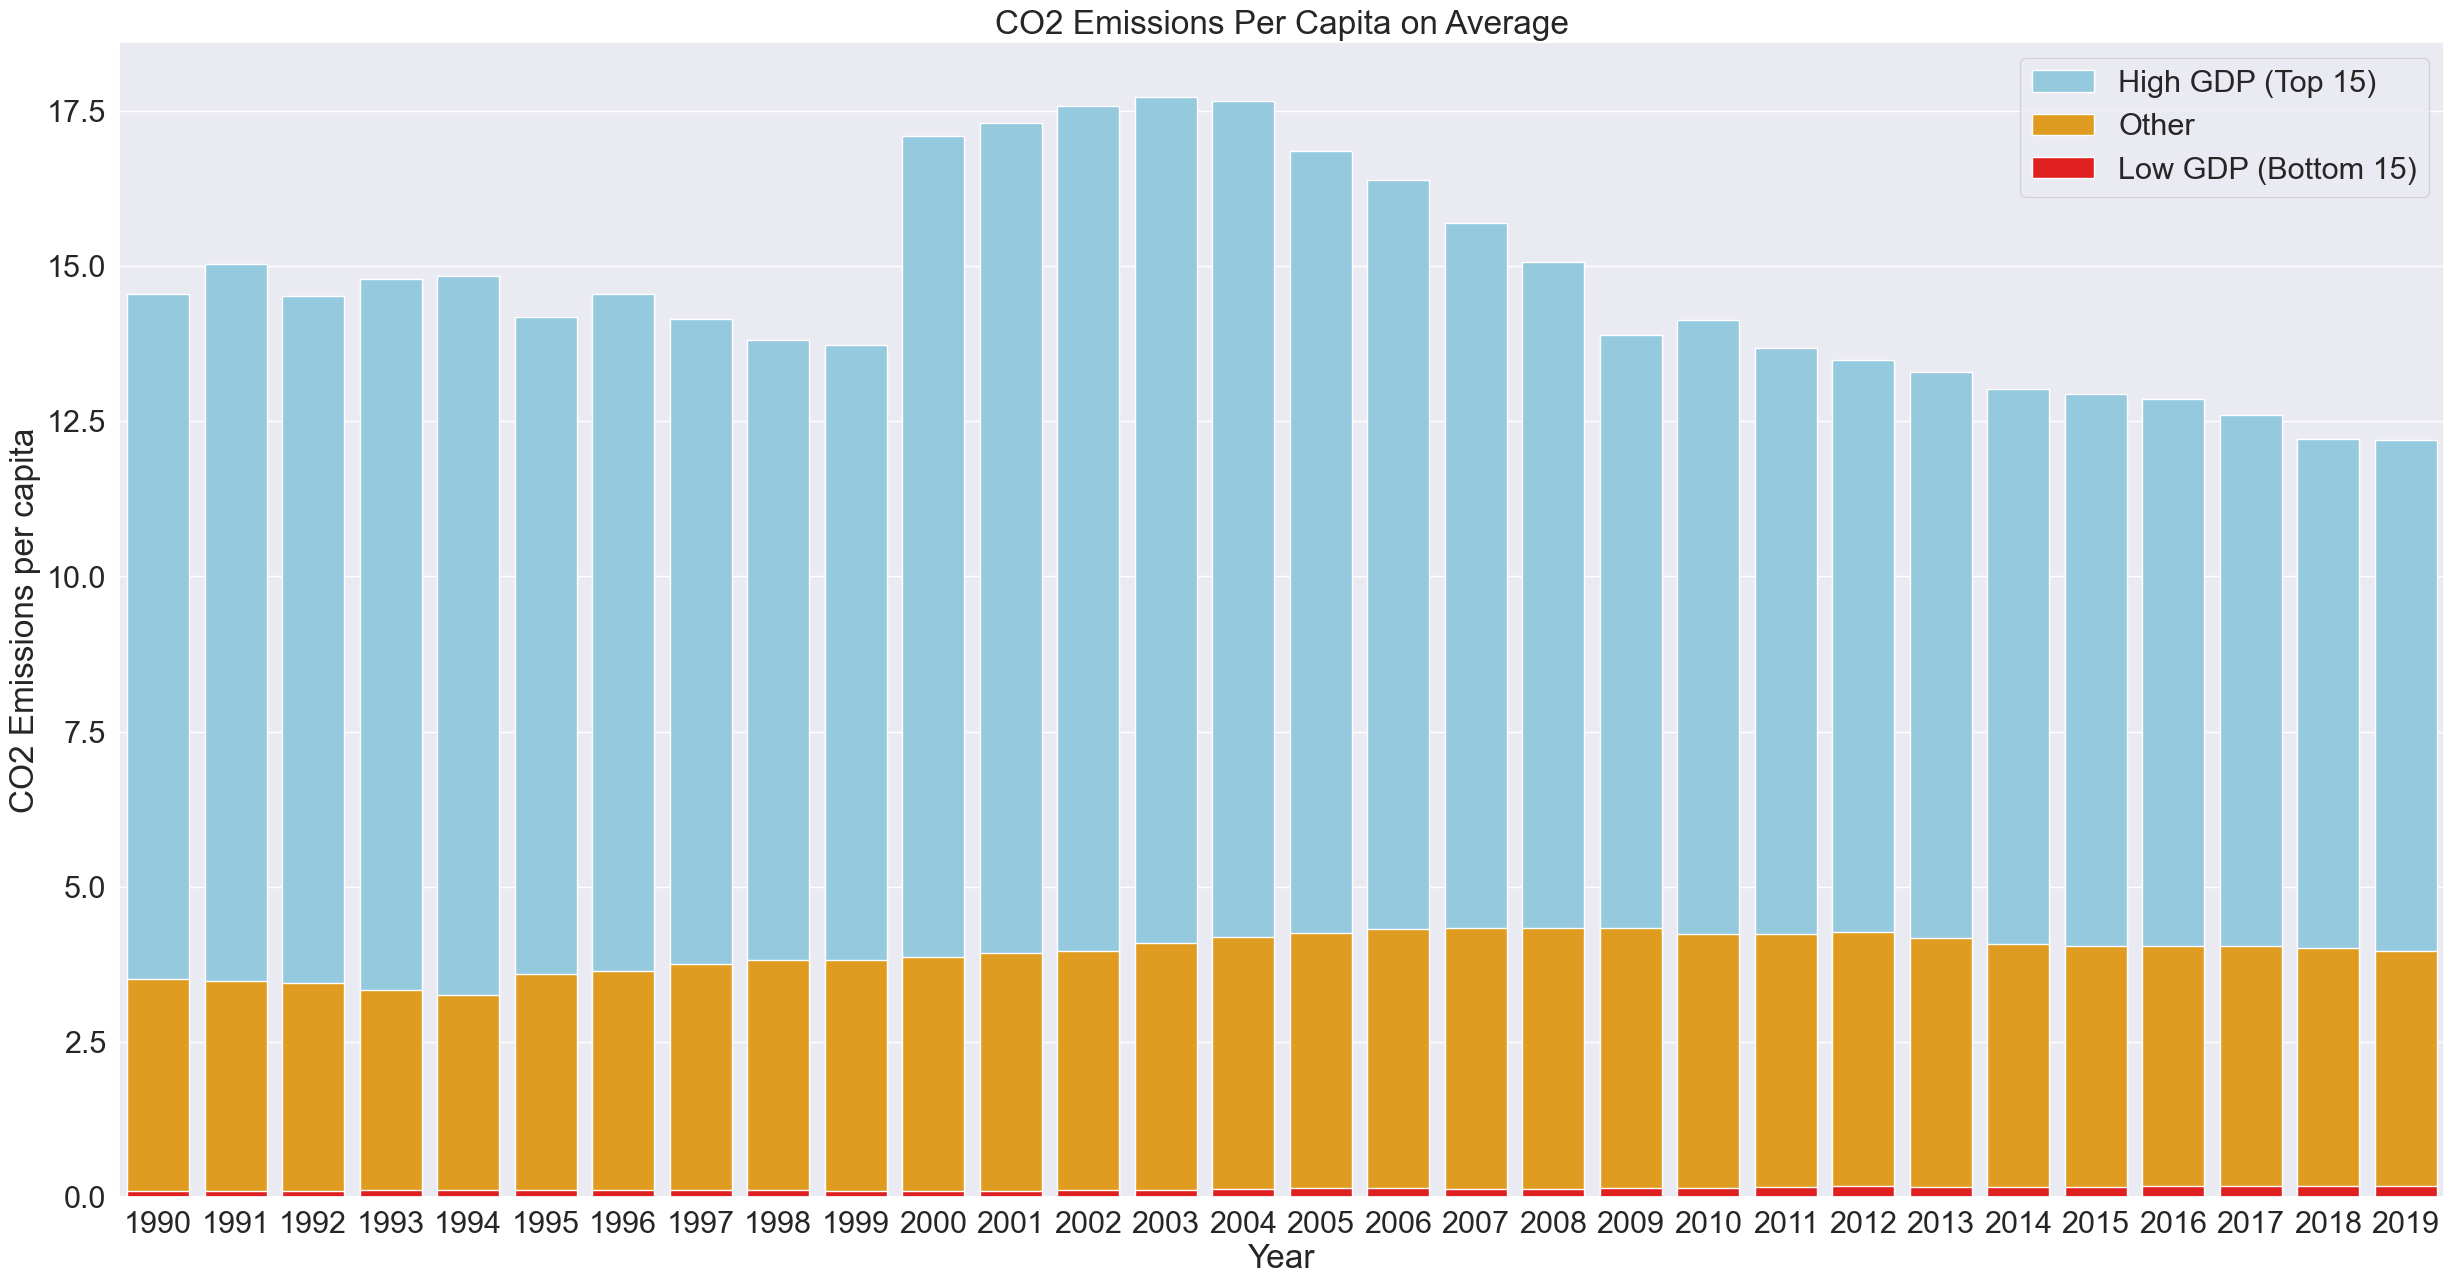

In [40]:
plt.figure(figsize=(30, 15))
plt.rcParams.update({'font.size': 30})

gdpCO2AnalysisHighGDP = emissionsAndGDP[emissionsAndGDP['GDP - PPP Ranking'] == "Top 15"]
barplot = sns.barplot(data=gdpCO2AnalysisHighGDP, y='CO2 emissions', x="Year", errorbar = None, color="skyblue", label="High GDP (Top 15)")

gdpCO2AnalysNeither = emissionsAndGDP[emissionsAndGDP['GDP - PPP Ranking'] == "Neither"]
sns.barplot(data=gdpCO2AnalysNeither, y="CO2 emissions", x="Year", errorbar = None, color='Orange', label="Other")

gdpCO2AnalysisLowGDP = emissionsAndGDP[emissionsAndGDP['GDP - PPP Ranking'] == "Bottom 15"]
sns.barplot(data=gdpCO2AnalysisLowGDP, y="CO2 emissions", x="Year", errorbar = None, color='red', label="Low GDP (Bottom 15)")


barplot.legend(ncol=2, loc="lower right", frameon=True)


barplot.set(title='CO2 Emissions Per Capita on Average')
barplot.set_ylabel("CO2 Emissions per capita")

plt.legend(loc='upper right')


fig = barplot.get_figure()
fig.savefig("../images/notebook2fig3.png")

#### Question: How does the average CO2 emissions per capita of high GDP countries compare to low GDP countries, and the rest of the world? Has this changed over the years?

From this bar graph we can see that high GDP countries have incredibly high CO2 emissions per capita (ranging from 17 - 13 tons). It's more than (roughly) triple the amount of the rest of the world which hovers at around 3 tons, for all the years displayed. Meanwhile, it is hard to even see the average CO2 emissions for low GDP countries, because it is so low in comparison to high GDP countries. 

High GDP countries seem to have lowered their CO2 emissions in recent years, yet they still have a much higher average of CO2 emissions per capita when compared to the rest of the world and low GDP countries. 